In [2]:
import pandas as pd
import yfinance as yf
import plotly.express as px
import pycountry

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/GusdPaula/postgraduation_fiap/refs/heads/main/fase_4/TCH/World%20Energy%20Consumption.csv', sep=",", na_values="", nrows=10)

df['extra 1'] = ''
df['extra 2'] = ''

columns = df.columns

df = pd.read_csv('https://raw.githubusercontent.com/GusdPaula/postgraduation_fiap/refs/heads/main/fase_4/TCH/World%20Energy%20Consumption.csv', sep=",", na_values="", header=None, names=columns, skiprows=1)




C:\Users\Gustavo_SantosdePaul\AppData\Local\Temp\ipykernel_1648\3019210689.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/GusdPaula/postgraduation_fiap/refs/heads/main/fase_4/TCH/World%20Energy%20Consumption.csv', sep=",", na_values="", header=None, names=columns, skiprows=1)


In [4]:
# Function to get ISO alpha-3 code for a given country name
def get_iso_alpha_3(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except AttributeError:
        return None  # Return None if country is not found

# Apply the function to the 'Country' column to get ISO alpha-3 codes
df['ISO_Alpha_3'] = df['country'].apply(get_iso_alpha_3)

In [5]:
df = df[['oil_consumption', 'oil_production', 'country', 'ISO_Alpha_3', 'year']]

df.to_excel('teste.xlsx')

print(df.head(10))

   oil_consumption  oil_production        country ISO_Alpha_3  year
0              NaN             NaN  ASEAN (Ember)        None  2000
1              NaN             NaN  ASEAN (Ember)        None  2001
2              NaN             NaN  ASEAN (Ember)        None  2002
3              NaN             NaN  ASEAN (Ember)        None  2003
4              NaN             NaN  ASEAN (Ember)        None  2004
5              NaN             NaN  ASEAN (Ember)        None  2005
6              NaN             NaN  ASEAN (Ember)        None  2006
7              NaN             NaN  ASEAN (Ember)        None  2007
8              NaN             NaN  ASEAN (Ember)        None  2008
9              NaN             NaN  ASEAN (Ember)        None  2009


In [82]:
df = df[(pd.isna(df.oil_consumption) == False) | (pd.isna(df.oil_production) == False)]
df

,oil_consumption,oil_production,country,ISO_Alpha_3,year
103,NaN,0.0,Afghanistan,AFG,1980
104,NaN,0.0,Afghanistan,AFG,1981
105,NaN,0.0,Afghanistan,AFG,1982
106,NaN,0.0,Afghanistan,AFG,1983
107,NaN,0.0,Afghanistan,AFG,1984
...,...,...,...,...,...
22001,NaN,0.0,Zimbabwe,ZWE,2012
22002,NaN,0.0,Zimbabwe,ZWE,2013
22003,NaN,0.0,Zimbabwe,ZWE,2014
22004,NaN,0.0,Zimbabwe,ZWE,2015


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18202 entries, 103 to 22005
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   oil_consumption  5713 non-null   float64
 1   oil_production   17405 non-null  float64
 2   country          18202 non-null  object 
 3   ISO_Alpha_3      12500 non-null  object 
 4   year             18202 non-null  object 
dtypes: float64(2), object(3)
memory usage: 853.2+ KB


In [84]:
df = df.groupby(['country', 'ISO_Alpha_3', 'year'])[['oil_consumption', 'oil_production']].sum()

In [85]:
df

oil_consumption  oil_production
country     ISO_Alpha_3 year                                 
Afghanistan AFG         1980              0.0             0.0
                        1981              0.0             0.0
                        1982              0.0             0.0
                        1983              0.0             0.0
                        1984              0.0             0.0
...                                       ...             ...
Zimbabwe    ZWE         2012              0.0             0.0
                        2013              0.0             0.0
                        2014              0.0             0.0
                        2015              0.0             0.0
                        2016              0.0             0.0

[12500 rows x 2 columns]

In [86]:
df = df.reset_index()

In [87]:
df.year = df.year.astype(int)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          12500 non-null  object 
 1   ISO_Alpha_3      12500 non-null  object 
 2   year             12500 non-null  int32  
 3   oil_consumption  12500 non-null  float64
 4   oil_production   12500 non-null  float64
dtypes: float64(2), int32(1), object(2)
memory usage: 439.6+ KB


In [90]:
df = df[(df.oil_consumption > 0) | (df.oil_production > 0)]

In [93]:
df.sort_values('country')

,country,ISO_Alpha_3,year,oil_consumption,oil_production
70,Albania,ALB,1933,0.0,0.023
130,Albania,ALB,1993,0.0,7.426
129,Albania,ALB,1992,0.0,7.446
128,Albania,ALB,1991,0.0,12.826
127,Albania,ALB,1990,0.0,20.251
...,...,...,...,...,...
12402,Yemen,YEM,1999,0.0,222.892
12403,Yemen,YEM,2000,0.0,243.513
12404,Yemen,YEM,2001,0.0,249.263
12396,Yemen,YEM,1993,0.0,115.081


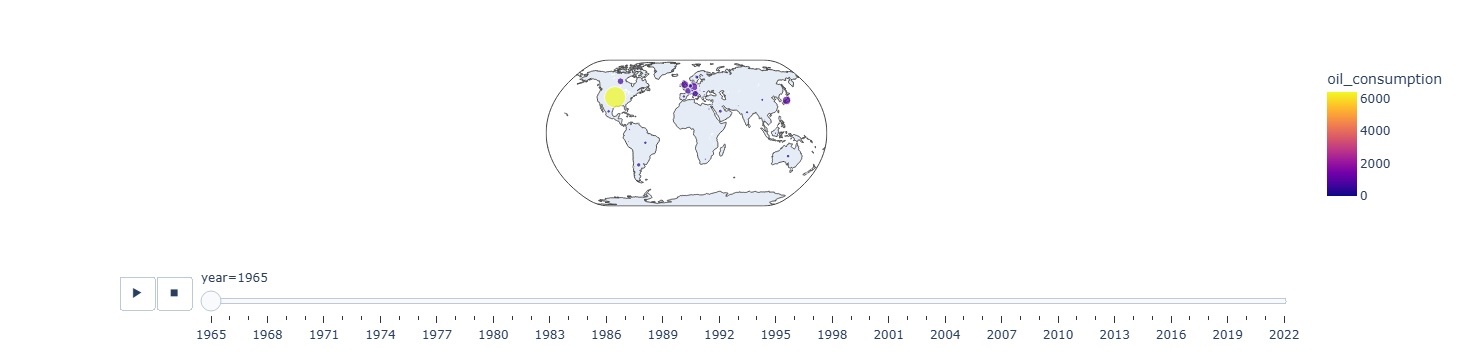

In [99]:
fig = px.scatter_geo(df[(df.oil_consumption > 0)], locations="ISO_Alpha_3", color="oil_consumption",
                     hover_name="country", size="oil_consumption",
                     projection="natural earth",
                     animation_frame="year")

fig.update_layout(
    sliders=[{
        'steps': [{'args': [[year], {'frame': {'duration': 500, 'redraw': True}}], 'label': str(year), 'method': 'animate'} for year in sorted(df[(df.oil_consumption > 0)]['year'].unique())]
    }]
)

fig.show()

In [73]:
fig = px.scatter_geo(df, locations="ISO_Alpha_3", color="oil_production",
                     hover_name="country", size="oil_production",
                     projection="natural earth")
fig.show()